In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

# Preparación de los datos

In [2]:
train_titles = pd.read_csv('train_titles.csv')
test_titles = pd.read_csv('test_titles.csv')
train_credits = pd.read_csv('train_credits.csv')
test_credits = pd.read_csv('test_credits.csv')

In [3]:
train_titles.head()

,train_idx,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,streaming,imdb_votes,imdb_score,target
0,0,tm164331,The Marquis,MOVIE,"Thomas Gardesse, a traveling alarm systems sal...",2011,G,88,"['comedy', 'european', 'crime', 'drama']",['FR'],NaN,amazon,816,4.9,3
1,1,ts89550,Fire Force,SHOW,"Year 198 of the Solar Era in Tokyo, special fi...",2019,TV-14,24,"['scifi', 'comedy', 'action', 'fantasy', 'anim...",['JP'],2.0,hulu,8621,7.6,6
2,2,tm79689,30 Days of Night,MOVIE,This is the story of an isolated Alaskan town ...,2007,R,113,"['horror', 'thriller', 'action']","['NZ', 'US']",NaN,hulu,181869,6.6,5
3,3,tm372366,306 Hollywood,MOVIE,When two siblings undertake an archaeological ...,2018,NaN,94,['documentation'],['US'],NaN,amazon,307,6.8,5
4,4,tm60248,Child's Play,MOVIE,A single mother gives her son a beloved doll f...,1988,R,87,"['horror', 'thriller', 'fantasy']",['US'],NaN,hbo,108017,6.6,5


In [4]:
print(train_titles.isna().sum())
print('---------------------------')
print(test_titles.isna().sum())

train_idx                   0
id                          0
title                       0
type                        0
description                33
release_year                0
age_certification        7899
runtime                     0
genres                      0
production_countries        0
seasons                 12123
streaming                   0
imdb_votes                  0
imdb_score                  0
target                      0
dtype: int64
---------------------------
id                         0
title                      0
type                       0
description                8
release_year               0
age_certification        987
runtime                    0
genres                     0
production_countries       0
seasons                 1209
imdb_votes                 0
streaming                  0
dtype: int64


In [5]:
train_titles.dropna(axis=0,subset=['description', 'age_certification','seasons'],inplace=True)
test_titles.dropna(axis=0,subset=['age_certification','seasons'],inplace=True)

In [6]:
train_credits.head()

,Unnamed: 0,person_id,id,name,character,role
0,0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,4,34171,tm87233,Henry Travers,Clarence,ACTOR


In [7]:
print(train_credits.isna().sum())
print('---------------------------')
print(test_credits.isna().sum())

Unnamed: 0        0
person_id         0
id                0
name              0
character     25453
role              0
dtype: int64
---------------------------
Unnamed: 0       0
person_id        0
id               0
name             0
character     2557
role             0
dtype: int64


In [8]:
test_credits.dropna(axis=0,subset=['character'],inplace=True)
test_credits.dropna(axis=0,subset=['character'],inplace=True)

In [9]:
##Viewing null values in the dataset
print(train_titles.isna().sum())
print('---------------------------')
print(test_titles.isna().sum())
print('---------------------------')
print(train_credits.isna().sum())
print('---------------------------')
print(test_credits.isna().sum())

train_idx               0
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
streaming               0
imdb_votes              0
imdb_score              0
target                  0
dtype: int64
---------------------------
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_votes              0
streaming               0
dtype: int64
---------------------------
Unnamed: 0        0
person_id         0
id                0
name              0
character     25453
role              0
dtype: int64
---------------------------
Unnamed: 0    0
person_id     0
id            0
name   

In [11]:
for columna in ['type','release_year','runtime','production_countries','seasons','streaming']:
    print(train_titles[columna].unique())

['SHOW']
[2019 2014 2023 2015 2010 2022 2018 1995 2021 2002 2013 2006 2020 2017
 2007 1996 1998 2012 2001 1989 2016 2004 2008 2011 1973 1994 1970 1987
 1999 2009 1981 2005 1983 1958 1975 1997 2003 1985 1967 1961 1993 1965
 1990 1974 1972 1992 1984 2000 1976 1991 1979 1969 1982 1988 1962 1968
 1952 1986 1971 1960 1964]
[ 24  21  57  45  50  52  23  49  59  43  27  18  68  12 100  25  42  22
  54  20  30  61  44  37  47  51  55  29  67  41  32  48  80  11  10  60
  34   4  14  15  46  53  56  58   6  87  62   0  28  33  35  26  16  86
  31  88  63  78  73   8  36  66 131   3  13   9  76   2  40  39  65  19
  89  71  75  38  64  84   7  94 109  93 110  90  72   5  70  74  85 165
   1  69  82  17  81  95  92  77  79 119 116  96]
["['JP']" "['US']" "['GB']" "['DE']" "['FR']" "['KR']" "['CA']" "['ES']"
 "['IS']" "['TW']" "['PH']" "['TH']" "['CO']" "['IN']" "['ID']"
 "['NZ', 'AU']" "['TR']" "['FI']" "['US', 'SG', 'MY', 'ID', 'PH']"
 "['IT']" "['AU']" "['CA', 'US']" "['AU', 'US']" "['NG']" "['

In [12]:
#TRAINING DATA

train_titles.drop('title',axis=1,inplace=True)
train_titles.drop('id',axis=1,inplace=True)
train_titles.drop('type',axis=1,inplace=True)
train_titles.drop('description',axis=1,inplace=True)
train_titles.drop('genres',axis=1,inplace =True)

In [13]:
#TEST DATA

test_titles.drop('title',axis=1,inplace=True)
test_titles.drop('id',axis=1,inplace=True)
test_titles.drop('type',axis=1,inplace=True)
test_titles.drop('description',axis=1,inplace=True)
test_titles.drop('genres',axis=1,inplace =True)


In [14]:
train_titles.head()

,train_idx,release_year,age_certification,runtime,production_countries,seasons,streaming,imdb_votes,imdb_score,target
1,1,2019,TV-14,24,['JP'],2.0,hulu,8621,7.6,6
8,8,2019,TV-14,24,['JP'],1.0,hulu,315,5.6,4
20,20,2014,TV-PG,21,['US'],4.0,hulu,87,7.0,6
24,24,2023,TV-G,57,['GB'],1.0,amazon,211,8.9,7
27,27,2015,TV-14,45,['DE'],2.0,netflix,1802,7.6,6


In [15]:
train_titles['country'] = train_titles['production_countries'].apply(lambda x: x.strip("[]").replace("'", "").split(",")[0].strip())
test_titles['country'] = test_titles['production_countries'].apply(lambda x: x.strip("[]").replace("'", "").split(",")[0].strip())
train_titles.drop('production_countries', axis=1, inplace=True)
test_titles.drop('production_countries', axis=1, inplace=True)

In [16]:
train_titles = pd.get_dummies(train_titles, columns=['age_certification', 'streaming', 'country'])
test_titles = pd.get_dummies(test_titles, columns=['age_certification', 'streaming', 'country'])

In [17]:
def get_imdb_score_class(score):
  if score < 2:  # 1 <= score < 2
    return 0
  elif score < 3:
    return 1
  elif score < 4:
    return 2
  elif score < 5:
    return 3
  elif score < 6:
    return 4
  elif score < 7:
    return 5
  elif score < 8:
    return 6
  elif score < 9:
    return 7
  else:  # 9 <= score <= 10
    return 8

# Using pandas apply method
train_titles['target'] = train_titles['imdb_score'].apply(get_imdb_score_class)

In [18]:
train_titles

,train_idx,release_year,runtime,seasons,imdb_votes,imdb_score,target,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,...,country_SE,country_SG,country_SN,country_TH,country_TR,country_TW,country_UA,country_US,country_VN,country_ZA
1,1,2019,24,2.0,8621,7.6,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,2019,24,1.0,315,5.6,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,20,2014,21,4.0,87,7.0,6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,24,2023,57,1.0,211,8.9,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27,27,2015,45,2.0,1802,7.6,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,16514,2019,23,3.0,3425,7.1,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16519,16519,2016,48,2.0,11202,8.0,7,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16523,16523,2018,14,1.0,103,7.5,6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16533,16533,2006,24,1.0,340298,9.0,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reg = pd.DataFrame(scaler.fit_transform(train_titles), columns=train_titles.columns)

In [20]:
target = 'target'
X_train = df_reg.loc[:,df_reg.columns!=target]
y_train = df_reg.loc[:,df_reg.columns==target]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2526, 77) (1083, 77) (2526, 1) (1083, 1)


In [24]:
import json
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

def evaluate_decision_tree(x_train, y_train, x_test, y_test):
    train_scores = []
    test_scores = []
    train_scores_mse, test_scores_mse = [],[]

    # Valores del parametro max_depth
    values = [i for i in range(1, 5)]

    # Evaluamos el arbol de decision para cada uno de los valores
    for i in values:
        # Creamos modelo
        model = DecisionTreeRegressor(max_depth=i)

        # fit model
        model.fit(x_train, y_train)

        # evaluate on the train dataset
        train_predict = model.predict(x_train)
        train_r2 = round(r2_score(y_train, train_predict), 3)
        train_scores.append(train_r2)
        
        #Calcular MSE TRAIN
        train_mse = round(mean_squared_error(y_train,train_predict),3)
        train_scores_mse.append(train_mse)

        # evaluate on the test dataset
        test_predict = model.predict(x_test)
        test_r2 = round(r2_score(y_test, test_predict),3)
        test_scores.append(test_r2)
        
        #Calcular MSE TEST
        test_mse = round(mean_squared_error(y_test,test_predict),3)
        test_scores_mse.append(test_mse)

        # Print result
        print("Iteración", i, "Train R2:", train_r2, ", Test R2:", test_r2, ", Train MSE:", train_mse, ", Test MSE:", test_mse)
    
    # Grafica con los valores del train y test para cada uno de los arboles de decision en funcion de r2
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.xlabel("max_depth")
    plt.ylabel("R2")
    plt.legend()


    plt.figure()
    plt.plot(values, train_scores_mse, '-o', label='Train')
    plt.plot(values, test_scores_mse, '-o', label='Test')
    plt.xlabel("max_depth")
    plt.ylabel("MSE")
    plt.legend()

    best_max_depth = 3
    final_model = DecisionTreeRegressor(max_depth=best_max_depth)
    final_model.fit(x_train, y_train)


    y_pred_target = final_model.predict(x_test)


    y_pred_target = [get_imdb_score_class(score) for score in y_pred_target]

    # Step 11: Create predictions.json
    predictions = {
        "target": dict(enumerate(y_pred_target, start=0))
    }

    # Step 12: Save predictions to JSON
    with open('predictions.json', 'w') as file:
        json.dump(predictions, file)

    plt.show()


Iteración 1 Train R2: 0.662 , Test R2: 0.649 , Train MSE: 0.007 , Test MSE: 0.007
Iteración 2 Train R2: 0.929 , Test R2: 0.919 , Train MSE: 0.001 , Test MSE: 0.002
Iteración 3 Train R2: 0.983 , Test R2: 0.978 , Train MSE: 0.0 , Test MSE: 0.0
Iteración 4 Train R2: 0.996 , Test R2: 0.995 , Train MSE: 0.0 , Test MSE: 0.0


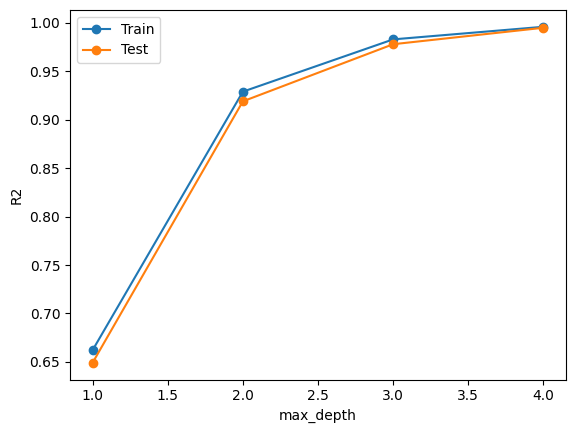

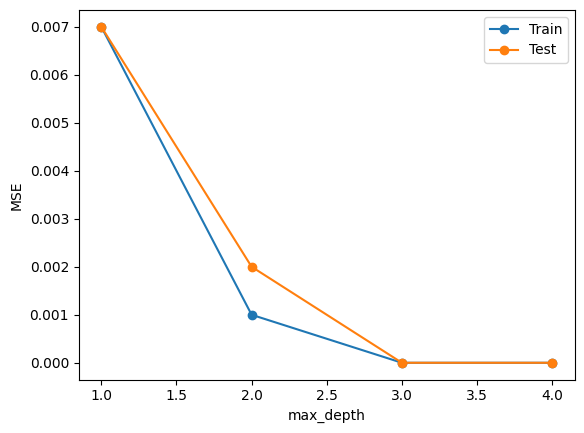

In [25]:
evaluate_decision_tree(x_train, y_train, x_test, y_test)